## Logistic Regression

For this lab, you will implement Logistic Regression with gradient descend to find a 2D decision boundary for binary classification. For full credit you'll have to write final functions in matrix format instead of loops (except for the gradient descend algorithm itself which needs a loop).

### Load dataset

Input data shape: (14, 2)
Output data shape: (14, 1)
#Features: 2 
Output Labels: [0 1]


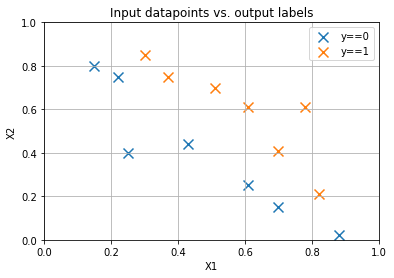

In [ ]:
import numpy as np

from matplotlib import pyplot as plt

X = np.array([
  [0.15, 0.8 ],
  [0.22, 0.75],
  [0.43, 0.44],
  [0.61, 0.25],
  [0.7 , 0.15],
  [0.88, 0.02],
  [0.25, 0.4 ],
  [0.3 , 0.85],
  [0.37, 0.75],
  [0.51, 0.7 ],
  [0.7 , 0.41],
  [0.82, 0.21],
  [0.61, 0.61],
  [0.78, 0.61]
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]).reshape(-1,1)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
print (f"Input data shape: {X.shape}")
print (f"Output data shape: {y.shape}")
print (f"#Features: {X.shape[1]} \nOutput Labels: {np.unique(y)}")

for yVal in np.unique(y):
  yIndex = y.reshape(-1) == yVal
  x1 = X[yIndex, 0]
  x2 = X[yIndex, 1]
  plt.scatter(x1, x2, marker='x', s=100, label=f"y=={yVal}")

plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Input datapoints vs. output labels")
plt.legend()

### Implement gradient descent algorithm for logistic regression and find the optimal decision boundary between class 0 and class 1. 

In [ ]:
def getSigmoid(X, theta):
  ''' Problem 1: Implement sigmoid function
      :param X: Input data: np.array (#datapoints, #features)
      :param theta: Current parameters: np.array (#features+1, 1)
      :returns: sigmoid of X = predicted probability of y==1: (#datapoints, 1)  
  '''
  x1 = np.ones((X.shape[0],1))
  X_new = np.append(x1, X, axis = 1)
  g_x = X_new.dot(theta)
  sigmoidX = 1.0 / (1 + (np.exp(-g_x)))
   
  return sigmoidX 

def getYpred(X, theta):
  ''' Problem 2: Predict y given X and theta
      :param X: Input data: np.array (#datapoints, #features)
      :param theta: Current parameters: np.array (#features+1, 1)
      :returns predictY: predicted values of y: (#datapoints, 1). Note this is a classification problem. 
  '''
  predictY = getSigmoid(X, theta)
  lis = []
  for i in predictY:
            if i>=0.5:
                lis.append(1)
            else:
                lis.append(0)

  return lis
  

def getCrossEntropyLoss( y, X, theta):
  ''' Problem 3: Compute cross entropy loss function
      :param y: Real output 1/0: (#datapoints, 1)
      :param sigmoidX:  sigmoid of X = predicted probability of y==1: (#datapoints, 1)
      :returns: Total cross entropy loss: float
  '''
  m = len(y)
  y_hat= getSigmoid(X, theta)
  err = (-y*(np.log(y_hat))-(1-y)*np.log(1-y_hat))
  
  loss = (err.sum())/(m)
  return loss

def getCrossEntropyLossGradient(X, y, theta):
  ''' Problem 4: Compute gradient of cross entopy loss
      :param X: Real intputs (#datapoints, #features)
      :param y: Real output (#datapoints, 1)
      :param theta: parameters (#features+1, 1)
      :returns: gradient of cross entopy loss function: (#features+1, 1)
  '''
  x1 = np.ones((X.shape[0],1))
  X_new = np.append(x1,X, axis=1)
  h_x = getSigmoid(X, theta)
  y_delta = h_x - y
  gradient = X_new.T.dot(y_delta)
  gradient = gradient/X.shape[0]
  return gradient
  

def performLogisticRegression(X, y, alpha=0.01, num_iterations=100):
  ''' Problem 5: Complete code for gradient descent algorithm
      :param X: Real intputs (#datapoints, #features)
      :param y: Real output (#datapoints, 1)
      :param alpha: Learning rate: float
      :param num_iterations: Max. number of iterations needed for convergence
      :returns: dict with list of losses per iteration and final theta/parameters learned.
  '''

  # Initialize theta! 
  numFeatures = X.shape[1]
  theta = np.zeros((numFeatures+1, 1))

  # Save all losses in a list!
  losses = []


  # START ----------------------
  for i in range(num_iterations):
    #sigmoidX = getSigmoid(X, theta)
    loss = getCrossEntropyLoss( y, X, theta)
    losses.append(loss)

    deltaLoss = loss 
    if np.abs(deltaLoss) < 0.01:
      break
    gradient = getCrossEntropyLossGradient(X, y, theta)

    theta = theta - alpha * gradient
  # END --------------------------
  print(f'Final Loss= {loss:.4f} at {i} iteration.')
  return {
      'losses': losses,
      'theta': theta,
  }


''' Problem 6: Pick right set of alpha, num_iterations so that the gradient descend algorithm converges with losses close to 0! 
    For full credit final loss must be <= 0.01
'''
alpha = 0.1
num_iterations = 600000

output = performLogisticRegression(X, y, alpha=alpha, num_iterations=num_iterations)

Final Loss= 0.0100 at 595823 iteration.


Final loss value: 0.0100, which is below our threshold?: True



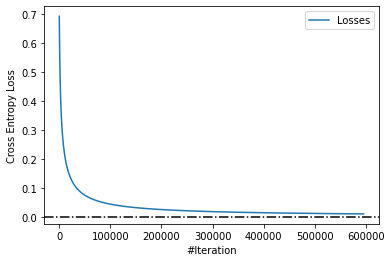

In [ ]:
# Plot losses: Should lower per-iteration tending to value to 0!
losses = output['losses']
if len(losses) > 0:
  print (f"Final loss value: {losses[-1]:.4f}, which is below our threshold?: {losses[-1] <= 0.01}\n")
plt.plot(losses, label='Losses')
plt.xlabel("#Iteration")
plt.ylabel("Cross Entropy Loss")
plt.axhline(0, ls= '-.', color='black')
plt.legend()

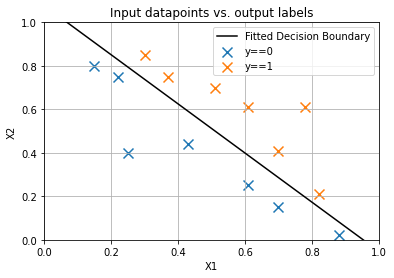

In [ ]:
# Visualize the final decision boundary!

finalTheta = output['theta']

def plotDecisionBoundary(X, y, theta):
  ''' Plot decision boundary..
  '''
  #np.seterr(invalid = 'ignore')
  xDelta = 0.1
  xx = np.arange(0, 1+xDelta, xDelta)
  yy = (-1*theta[0,0] - theta[1,0]*xx)/theta[2,0]
  plt.plot(xx, yy, color='black', label="Fitted Decision Boundary")
  
  for yVal in np.unique(y):
    yIndex = y.reshape(-1) == yVal
    x1 = X[yIndex, 0]
    x2 = X[yIndex, 1]
    plt.scatter(x1, x2, marker='x', s=100, label=f"y=={yVal}")

  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.grid()
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.title("Input datapoints vs. output labels")
  plt.legend()


plotDecisionBoundary(X, y, finalTheta)

#### Problem 7: Given the plotting function above what does theta represent with respect to input X and output y? i.e. what does theta[0,0], theta[1,0] & theta[2,0] mean wrt. to our final decision boundary aka final predictions?


#### Solution:
theta represent decision boundary which help in estimating model performance.

theta helps to draw the decision boundary to separate features(X) into class(y).

Here, 

$\theta_{0}+\theta_{1} * X_{1}+\theta_{2}*X_{2}=0$ is decision boundary.

From equation, $y = m*x + c$

Therefore,

$-\frac{theta[1,0]}{theta[2,0]}$  gives y-intercept.

$-\frac{theta[0,0]} {theta[2,0]}$ gives slope.


In [ ]:
def checkEqual(X, y, theta):
  ''' Problem 8: Check if all values of y predicted equals actual y.  
      :param X: Real intputs (#datapoints, #features)
      :param y: Real output (#datapoints, 1)
      :param theta: parameters (#features+1, 1)
      :returns: Boolean True if all y_predicted equals y_true! else False
  '''
  y_p= getYpred(X, theta)
  
  y_true = y.T
   
  return (y_p == y_true).all()


checkEqual(X, y, finalTheta) #Should be True!


True